In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dtc = DecisionTreeClassifier()
print('ans1 =', cross_val_score(dtc, X, y, cv=10).mean())

ans1 = 0.8246679081315952


In [21]:
from sklearn.ensemble import BaggingClassifier

bc1 = BaggingClassifier(DecisionTreeClassifier(), 100)
print('ans2 =', cross_val_score(bc1, X, y, cv=10).mean())

ans2 = 0.9237243947858473


In [22]:
bc2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
print('ans3 =', cross_val_score(bc2, X, y, cv=10).mean())

ans3 = 0.9310055865921786


In [23]:
bc3 = BaggingClassifier(DecisionTreeClassifier(max_features=int(np.sqrt(X.shape[1]))), n_estimators=100, bootstrap=False)
print('ans4 =', cross_val_score(bc3, X, y, cv=10).mean())

ans4 = 0.9565859714463066


In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
print('ans =', cross_val_score(rfc, X, y, cv=10).mean())

ans = 0.9476753569211669


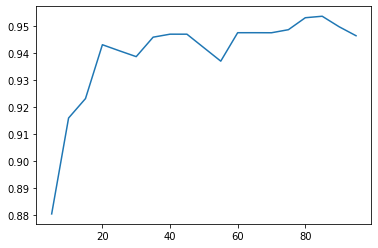

In [25]:
# Как случайный лес зависит от роста кол-ва деревьев
scores = []
for n in range(5, 100, 5):
  rfc = RandomForestClassifier(n_estimators=n)
  scores.append(cross_val_score(rfc, X, y, cv=10).mean())
plt.plot(range(5, 100, 5), scores)

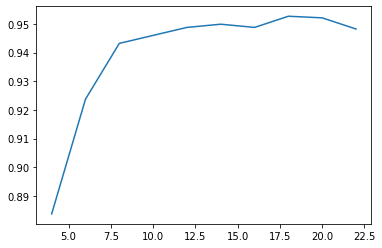

In [26]:
# Как случайный лес зависит от глубины
scores = []
for depth in range(4, 24, 2):
  rfc = RandomForestClassifier(max_depth=depth)
  scores.append(cross_val_score(rfc, X, y, cv=10).mean())
plt.plot(range(4, 24, 2), scores)